**Prototype for Importing Jhe-Lab Approach Curve Data**

We will define helper functions that imports resonance curve and approach curve data

In [55]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def ResCurve_Importer(filepath, visualize = False, fit_param_init = [5000, 3, 1/800]):
    '''
    <ResCurve_Importer>
    
    Inputs: filepath 
        filepath - filepath of the resonance curve file
    
    Outputs: res_data, fit_param, w
        res_data - resonance curve data in pandas dataframe format
        fit_param - resonance curve fitting parameters, [w0, Q, I0, C0/C]
        w - driving frequency (assumes that the driving frequency is the frequency at which the resonance curve takes its maximum)
    '''
    
    # Define the resonance curve function as an inner function
    def _ResCurve(w, w0, Q, I_0, C0_C):
        W = w/w0
        return (I_0*W/Q)*np.sqrt(np.divide(1+2*C0_C*(1-W**2)+(C0_C*(1-W**2))**2+(C0_C*W/Q)**2, (1-W**2)**2+(W/Q)**2))
    
    # Import resonance curve data using pandas
    # The parameter skiprows ensures that the comments on the top 
    res_data = pd.read_csv(filepath, header = None, delimiter = '\t', skiprows = 9)
    
    # Res curve is in the format [freq, amp, freq, phas, aux], so drop the redundant 3rd column
    res_data = res_data.drop(res_data.columns[4], axis = 1)
    res_data = res_data.drop(res_data.columns[2], axis = 1)
    
    # Set appropriate column name
    res_data.rename(columns = {0:'Frequency(Hz)', 1:'Amplitude(V)', 3:'Phase(V)'}, inplace = True)
    
    # Numpy array of the resonance curve data in [freq, amp, phas] format
    res_array = res_data.values
    
    # Frequency of  the maximum amplitude measured. This is equal the driving frequency used
    w0_init = res_array[res_array[:,1].argmax(),0] 
    w = w0_init
    
    # Fit the resonance curve
    Q_init, I0_init, C0_C_init = fit_param_init
    fit_param, _ = curve_fit(_ResCurve, res_array[:,0], res_array[:,1], p0 = [w0_init, Q_init, I0_init, C0_C_init], bounds = (0, np.inf))
    
    if visualize:
        # For the visualize keyword, create a figure of the experimental and fitted resonance curve
        fontsize = 13
        labelpad = 10
        tkw = dict(size = 6, width = 1.5, labelsize = fontsize)
        
        fig, ax_left = plt.subplots(1, 1, figsize = (7,5))
        ax_left.plot(res_array[:,0], res_array[:,1], '.-k', label = 'Amplitude(V)')
        ax_left.plot(res_array[:,0], _ResCurve(res_array[:,0], *fit_param), '-r', alpha = 0.8, label = 'Fitted Curve')
        ax_left.set_xlabel('Frequency (Hz)', fontsize = fontsize, labelpad = labelpad)
        ax_left.set_ylabel('Amplitude (V)', fontsize = fontsize, labelpad = labelpad)
        
        ax_right = ax_left.twinx()
        ax_right.plot(res_array[:,0], res_array[:,2], '.-b', alpha = 0.2, label = 'Phase(V)')
        ax_right.set_ylabel('Phase(V)', fontsize = fontsize, labelpad = labelpad)
        ax_left.grid(ls = '--')
        
        h_right, l_right = ax_right.get_legend_handles_labels()
        h_left, l_left = ax_left.get_legend_handles_labels()
        
        ax_left.tick_params(axis='x', **tkw)
        ax_left.tick_params(axis='y', **tkw)
        ax_right.tick_params(axis='y', colors='blue', **tkw)
        ax_right.yaxis.label.set_color('blue')
            
        ax_right.legend(h_right+h_left, l_right+l_left, loc = 'upper right', fontsize = fontsize - 1)
        
    return res_data, fit_param, w

    

In [3]:
import pandas as pd
filepath = '~/Projects/Jhe_Lab/CP_Detection/AFM_CP_Detection/Raw_Data/Shear_Mode/Dohyun/171124_RH20/res_freq_RH20.txt'

In [19]:
res_data = pd.read_csv(filepath, header = None, delimiter = '\t', skiprows = 9)
res_data.head(5)

,0,1,2,3,4
0,32451.5,0.992340,32451.5,1.342201,NaN
1,32453.5,0.993317,32453.5,1.341615,NaN
2,32455.5,0.990753,32455.5,1.341605,NaN
3,32457.5,0.999084,32457.5,1.340529,NaN
4,32459.5,0.995514,32459.5,1.343906,NaN


In [20]:
res_data = res_data.drop(res_data.columns[4], axis = 1)
res_data = res_data.drop(res_data.columns[2], axis = 1)
res_data.rename(columns = {0:'Frequency(Hz)', 1:'Amplitude(V)', 3:'Phase(V)'}, inplace = True)
res_data.head(5)

,Frequency(Hz),Amplitude(V),Phase(V)
0,32451.5,0.992340,1.342201
1,32453.5,0.993317,1.341615
2,32455.5,0.990753,1.341605
3,32457.5,0.999084,1.340529
4,32459.5,0.995514,1.343906


(     Frequency(Hz)  Amplitude(V)  Phase(V)
 0          32451.5      0.992340  1.342201
 1          32453.5      0.993317  1.341615
 2          32455.5      0.990753  1.341605
 3          32457.5      0.999084  1.340529
 4          32459.5      0.995514  1.343906
 5          32461.5      0.998322  1.346366
 6          32463.5      0.998260  1.344225
 7          32465.5      0.999054  1.343032
 8          32467.5      0.998260  1.341860
 9          32469.5      1.001038  1.343277
 10         32471.5      0.997772  1.344758
 11         32473.5      1.003265  1.341946
 12         32475.5      1.002167  1.347762
 13         32477.5      0.996735  1.343000
 14         32479.5      1.001007  1.343075
 15         32481.5      0.994873  1.344758
 16         32483.5      0.999939  1.340880
 17         32485.5      1.001953  1.338803
 18         32487.5      1.002838  1.342787
 19         32489.5      1.005493  1.341615
 20         32491.5      1.009277  1.344289
 21         32493.5      1.00091

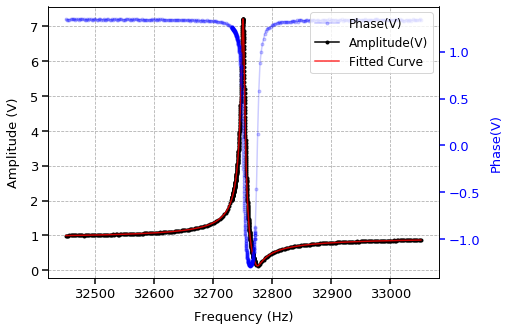

In [56]:
ResCurve_Importer(filepath, visualize = True)